# OUR PROBLEM/TASK STATEMENT-

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# THE BUSINESS GOAL-

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## IMPORTING PYTHON LIBRARIES AND OUR DATA SET

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl


In [9]:
df = pd.read_csv('cars.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df.shape

(205, 26)

In [13]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [18]:
df['CarName'].value_counts()

toyota corona            6
toyota corolla           6
peugeot 504              6
subaru dl                4
toyota mark ii           3
                        ..
dodge colt (sw)          1
audi 5000s (diesel)      1
audi fox                 1
chevrolet monte carlo    1
volvo 246                1
Name: CarName, Length: 147, dtype: int64

## REMOVING NULL VALUES AND REPEATED VALUES FROM OUR DATASET

In [21]:
df.dropna()
df.dropna(axis='columns', how='any')
df.shape

(205, 26)

In [ ]:
# NO NULL VALUES WERE FOUND IN THE DATASET AS THE DF.SHAPE OUTPUT REMAINS THE SAME

In [22]:
df.drop_duplicates(subset ="CarName", 
                     keep = False, inplace = True) 
df.shape

(109, 26)

In [ ]:
# WE HAVE REMOVED 96 CAR ENTRIES THAT WERE FEATURED IN THE DATASET MORE THAN ONCE

In [23]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


## OUT OF THE 26 COLUMNS, WE MUST SELECT 3 TO SERVE AS FEATURES OR PARAMETERS FOR OUR PRICE ESTIMATION REGRESSION MODEL

In [ ]:
# THE THREE PARAMETERS THAT WE ARE SELECTING (x1, x2, x3) WILL BE 'ENGINESIZE', 'HORSEPOWER' AND A NEW COLUMN 'MILEAGE' WHICH WILL BE THE AVERAGE OF 'CITYMPG' AND 'HIGHWAYMPG'

## CREATING A NEW COLUMNS FOR MILEAGE

In [36]:
df['mileage'] = (df['citympg'] + df['highwaympg'])/2


## CREATING OUR NEW DATA SET DF_S

In [38]:
df_s = df[['enginesize', 'horsepower', 'mileage', 'price']]
df_s.head()

,enginesize,horsepower,mileage,price
0,130,111,24.0,13495.0
1,130,111,24.0,16500.0
2,152,154,22.5,16500.0
3,109,102,27.0,13950.0
5,136,110,22.0,15250.0


TO UNDERSTAND THE RELATIONSHIP BETWEEN PARAMETERS AND THE PRICE, WE WILL PLOT EACH PARAMETER VS PRICE ON A SCATTER PLOT

## SCATTER PLOT - ENGINE SIZE VS PRICE

<function matplotlib.pyplot.show(*args, **kw)>

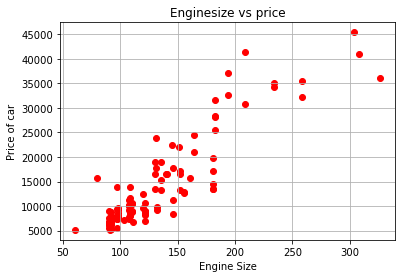

In [44]:
plt.xlabel('Engine Size')
plt.ylabel('Price of car')
plt.title('Enginesize vs price')
plt.scatter(df_s.enginesize, df_s.price, color = 'red')
plt.grid(True)
plt.show

## SCATTER PLOT FOR HORSEPOWER VS PRICE

<function matplotlib.pyplot.show(*args, **kw)>

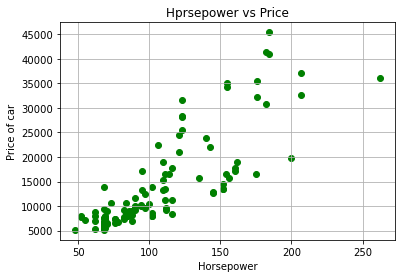

In [43]:
plt.xlabel('Horsepower')
plt.ylabel('Price of car')
plt.title('Hprsepower vs Price')
plt.grid(True)
plt.scatter(df_s.horsepower, df_s.price, color='green')
plt.show

## SCATTER PLOT MILEAGE VS PRICE

<function matplotlib.pyplot.show(*args, **kw)>

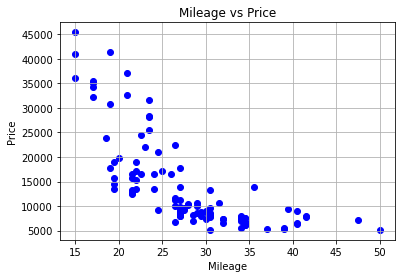

In [42]:
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.grid(True)
plt.scatter(df_s.mileage, df_s.price, color='blue')
plt.show

## SPLITTING OUR DATA SET INTO TRAIN SET (80%) AND TEST SET (20%)

In [46]:
msk = np.random.rand(len(df_s)) < 0.8
train = df_s[msk]
test = df_s[~msk]

### TRAINING DATA VISUALIZATION

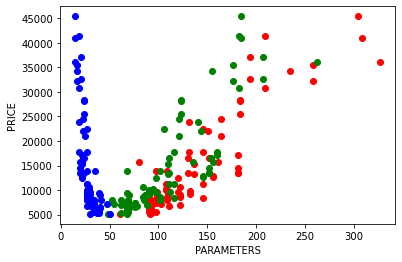

In [47]:
plt.scatter(train.enginesize, train.price,  color='red')

plt.scatter(train.horsepower, train.price,  color='green')

plt.scatter(train.mileage, train.price,  color='blue')
plt.xlabel("PARAMETERS")
plt.ylabel("PRICE")
plt.show()

## USING SK LEARN TO FIT A REGRESSION INTO OUR TRAIN DATA

In [52]:
from sklearn import linear_model
from sklearn.metrics import r2_score
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['enginesize','horsepower','mileage']])
y = np.asanyarray(train[['price']])
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)

Coefficients:  [[122.48498358  65.78019439  25.42157357]]


# TESTING OUR MODEL AND EVALUATING ITS VARIANCE SCORE, R2 SCORE, RESIDUAL SUM OF SQUARES, MEAN ABSOLUTE ERROR

In [57]:
y_hat= regr.predict(test[['enginesize','horsepower', 'mileage']])
x = np.asanyarray(test[['enginesize','horsepower','mileage']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 11628720.70
Mean absolute error: 2502.88
Residual sum of squares (MSE): 11628720.70
R2-score: 0.68
Variance score: 0.79


### THE MODEL SCORED 0.79 ON THE VARIANCE SCORE AND 0.68 ON THE R2 SCORE